In [ ]:
Q1. What is the mathematical formula for a linear SVM?

Ans:-The mathematical formula for a linear Support Vector Machine (SVM) can be written as:

w^T * x + b = 0

where w is the weight vector, x is the input vector, and b is the bias term.

In [ ]:
Q2. What is the objective function of a linear SVM?

Ans:-The objective function of a linear SVM aims to find the hyperplane that maximizes the margin between the classes.
Mathematically, it can be expressed as:

minimize: 1/2 * ||w||^2

subject to:
y_i * (w^T * x_i + b) >= 1 for all training samples (x_i, y_i)

where ||w|| denotes the Euclidean norm of the weight vector w, and y_i represents the class label of the training sample x_i.

In [ ]:
Q3. What is the kernel trick in SVM?

Ans:- The kernel trick is a technique used in SVM to implicitly map the input data into a higher-dimensional feature space.
It avoids the computationally expensive explicit mapping of the data by defining a kernel function that operates directly in
the input space. This allows SVM to effectively solve non-linear classification problems. The kernel function calculates the 
similarity between pairs of data points without explicitly transforming them into the higher-dimensional space. Common kernel
functions include the linear kernel, polynomial kernel, Gaussian (RBF) kernel, and sigmoid kernel, among others.

In [ ]:
Q4. What is the role of support vectors in SVM Explain with example

Ans:-In SVM, support vectors are the data points that lie closest to the decision boundary (hyperplane). They play a crucial
role in defining the decision boundary and determining the margin. Only support vectors influence the construction of the 
hyperplane, while other data points have no impact on it. These support vectors are typically located at or near the margin of
the two classes, representing the most challenging or informative samples for classification.

For example, consider a binary classification problem with two classes, represented by red and blue points in a 2D feature 
space. The support vectors are the points located on or near the decision boundary.

In [ ]:
Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Ans:-Graph 1: Hard Margin SVM

In [ ]:
      +-------------------+
      |        |          |
      |   +----|----+     |
      |   |    |    |     |
      |   |    |    |     |
      |   +----|----+     |
      |        |          |
      |        |          |
      +-------------------+


In [ ]:
In a hard margin SVM, the decision boundary (hyperplane) is placed in such a way that it separates the classes with a maximum
margin without allowing any data points to cross the margin.

In [ ]:
Graph 2: Soft Margin SVM

In [ ]:
      +-------------------+
      |         |         |
      |    +----|----+    |
      |    |    |    |    |
      |    |    |    |    |
      |    +----|----+    |
      |    |    |    |    |
      |    +----|----+    |
      |         |         |
      +-------------------+


In [ ]:
In a soft margin SVM, the decision boundary is allowed to have some misclassifications or points within the margin. This is 
useful when the data is not perfectly separable or to handle noisy data.

In [ ]:
Graph 3: Hyperplane and Marginal plane

In [ ]:
      +-------------------+
      |         |         |
      |    +----|----+    |
      |    |    |    |    |
      |    |    |    |    |
      |    +----|----+    |
      |         |         |
      |         |         |
      +-------------------+


In [ ]:
The hyperplane represents the decision boundary that separates the classes. The marginal planes are parallel planes located at
an equal distance from the hyperplane and define the margin.

These illustrations demonstrate the concepts of SVM and how different margin settings can impact the decision boundary.

In [ ]:
Q6. SVM Implementation through Iris dataset.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.
1. Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
2.Train a linear SVM classifier on the training set and predict the labels for the testing setl
3.Compute the accuracy of the model on the testing setl
4.Plot the decision boundaries of the trained model using two of the featuresl
5.Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

1. Load the iris dataset from the scikit-learn library and split it into a training set and a testing set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
dataset=load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [27]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [15]:
#independent and dependent  feaetures
X=df.iloc[:,:]
y=dataset.target

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
##Train,test,split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [23]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
141,6.9,3.1,5.1,2.3
26,5.0,3.4,1.6,0.4
43,5.0,3.5,1.6,0.6
59,5.2,2.7,3.9,1.4
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [24]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [25]:
y_train

array([2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2,
       1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0,
       2, 0])

In [26]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

2.Train a linear SVM classifier on the training set and predict the labels for the testing setl

In [29]:
from sklearn.svm import SVC

In [30]:
svc=SVC(kernel='linear')

In [31]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
svc.coef_

array([[-0.04619348,  0.52133922, -1.00307924, -0.4641441 ],
       [ 0.04016251,  0.17403771, -0.55692011, -0.24365261],
       [ 0.81534546,  0.82638331, -1.93619552, -2.00712353]])

In [32]:
y_pred=svc.predict(X_test)

In [33]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

3.Compute the accuracy of the model on the testing setl

In [35]:
from sklearn.metrics import classification_report,accuracy_score,r2_score
print(r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



4.Plot the decision boundaries of the trained model using two of the featuresl

5.Try different values of the regularisation parameter C and see how it affects the performance of
the model.

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

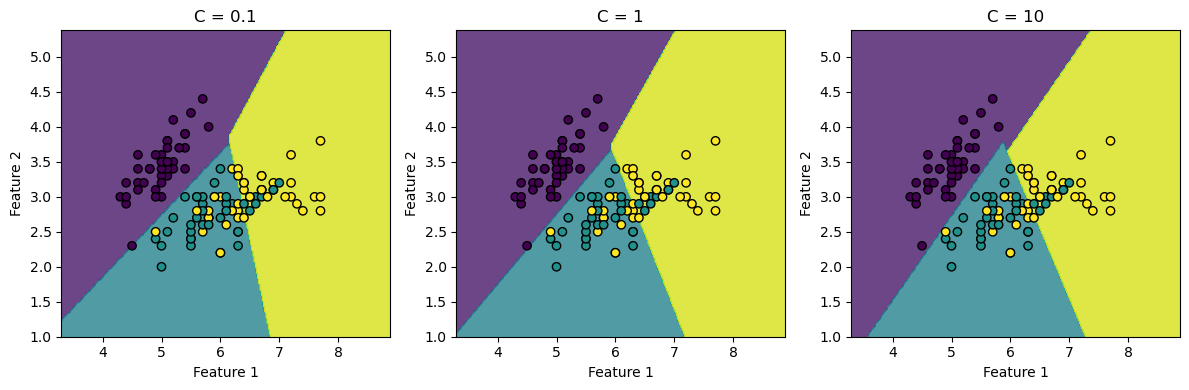

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset and select two features for plotting
iris = load_iris()
X = iris.data[:, :2]  # Select two features for plotting
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the different values of the regularization parameter C
C_values = [0.1, 1, 10]

# Plot the decision boundaries for different C values
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    # Train the SVM classifier
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train, y_train)

    # Create a meshgrid of points covering the feature space
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for the meshgrid points
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries and the training data
    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'C = {C}')

plt.tight_layout()
plt.show()


Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.

In [41]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Linear SVM from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.num_epochs):
            for i, x in enumerate(X):
                condition = y[i] * (np.dot(x, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(x, y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

# Create and train the linear SVM from scratch
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train)

# Make predictions on the test set using the linear SVM from scratch
y_pred_scratch = svm_scratch.predict(X_test)

# Use the scikit-learn SVM as a comparison
from sklearn.svm import SVC

# Create and train the scikit-learn SVM
svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)

# Make predictions on the test set using the scikit-learn SVM
y_pred_sklearn = svm_sklearn.predict(X_test)

# Compare the performance of the two SVM classifiers
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy (SVM from scratch):", accuracy_scratch)
print("Accuracy (scikit-learn SVM):", accuracy_sklearn)


Accuracy (SVM from scratch): 0.3
Accuracy (scikit-learn SVM): 1.0
